In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
import decoding_analysis_vis as dav
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xarray as xr

No module named 'cellpose'
cannot use anatomical mode, but otherwise suite2p will run normally


In [3]:
tmp = dav.SimpleSession(verbose=1, session_id=0)

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons


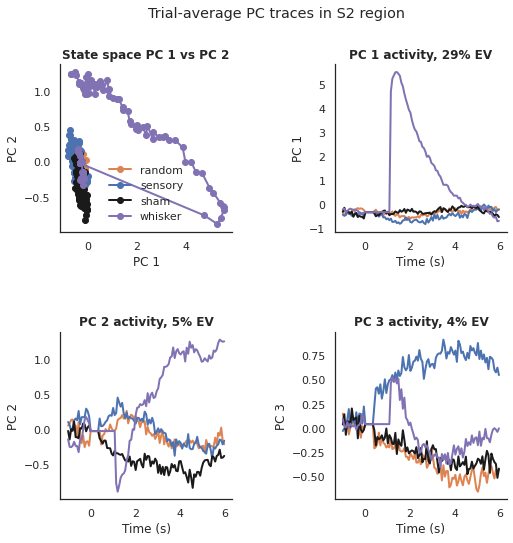

In [96]:
dav.plot_pca_time_aggr_activity(Ses=tmp, trial_type_list=['sensory', 'random', 'sham', 'whisker'], merge_trial_types_during_pca=True)

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons
session name : 2020-09-08_RL099.pkl
Excluded 276 out of 2095 neurons
session name : 2020-09-14_RL101.pkl
Excluded 602 out of 2169 neurons
session name : 2020-09-16_RL103.pkl
Excluded 461 out of 2106 neurons
session name : 2020-10-02_RL108.pkl
Excluded 969 out of 2563 neurons
session name : 2020-10-12_RL109.pkl
Excluded 843 out of 2515 neurons


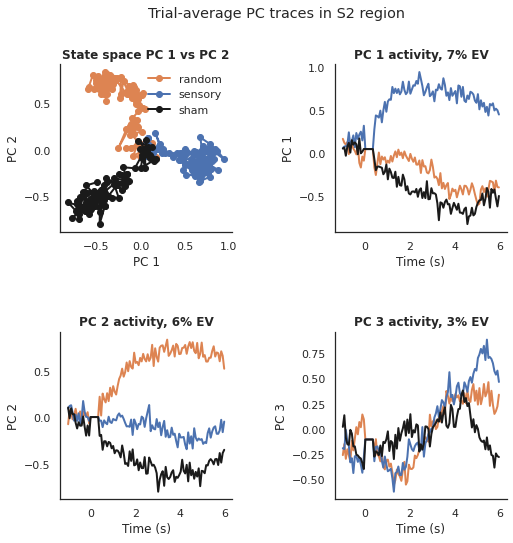

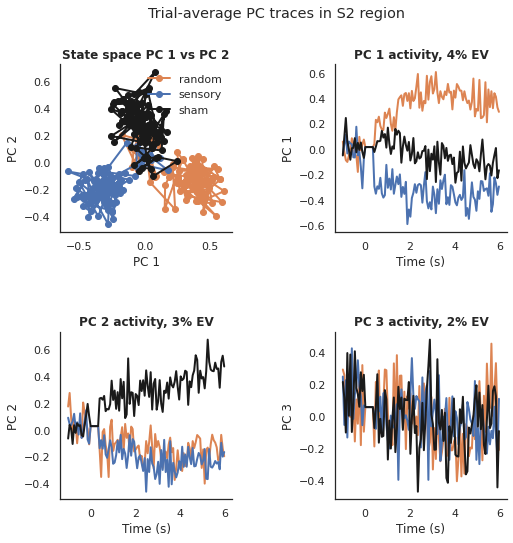

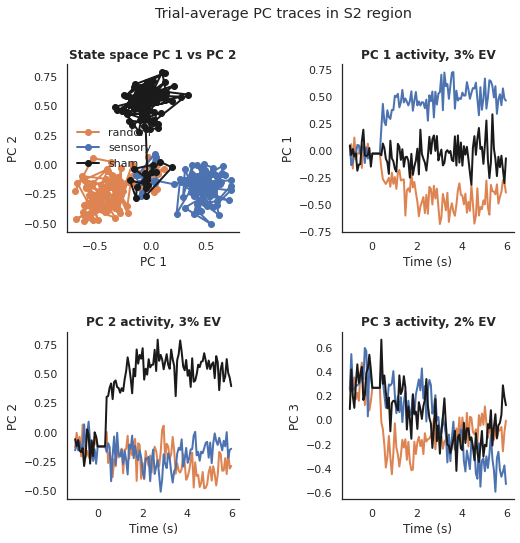

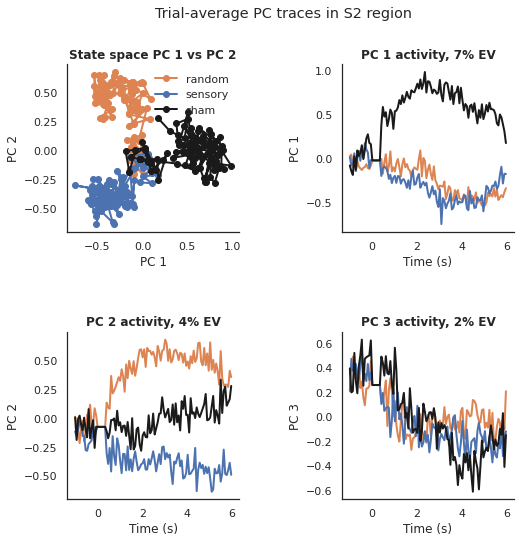

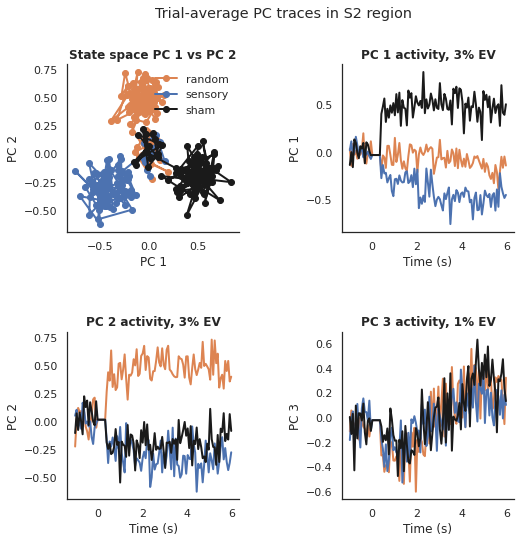

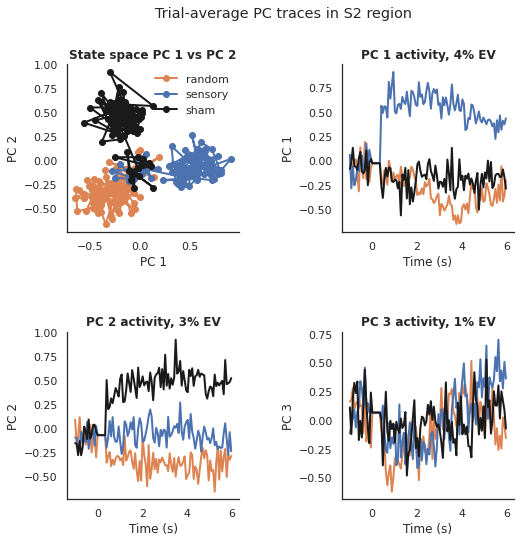

In [97]:
for sid in range(6):
    tmp = dav.SimpleSession(verbose=1, session_id=sid)
    dav.plot_pca_time_aggr_activity(Ses=tmp, trial_type_list=['sensory', 'random', 'sham'], merge_trial_types_during_pca=True,
                save_fig=True)

Creating time aggregated data
Neurons sorted by euclidean


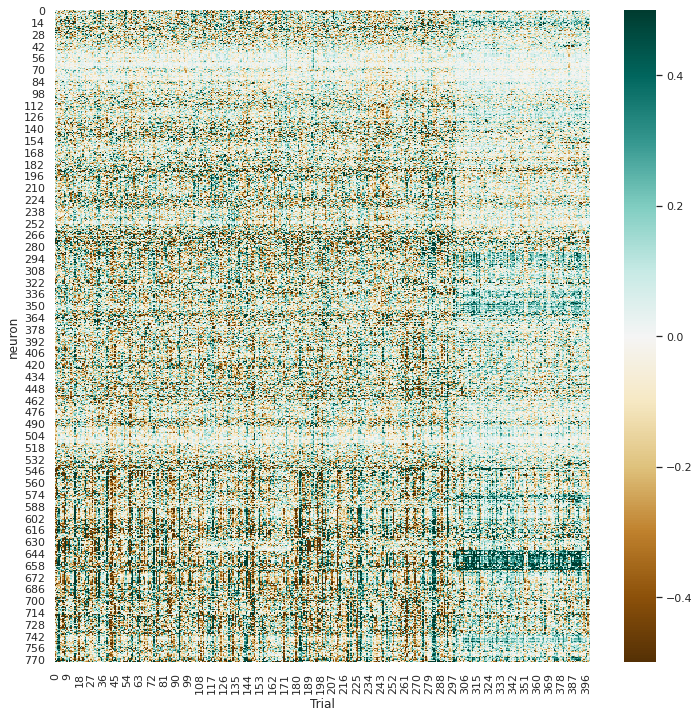

In [12]:
dav.plot_raster_sorted_activity(Ses=tmp, create_new_time_aggr_data=True, 
                        sort_here=True,
                    plot_trial_type_list=['sensory', 'random', 'whisker', 'sham'])

In [56]:
(tmpr.trial_type == ['sensory', 'sham']).all()

<xarray.DataArray 'trial_type' ()>
array(True)

[0.04691993 0.01363621 0.01130082]
Subtracted LFA.


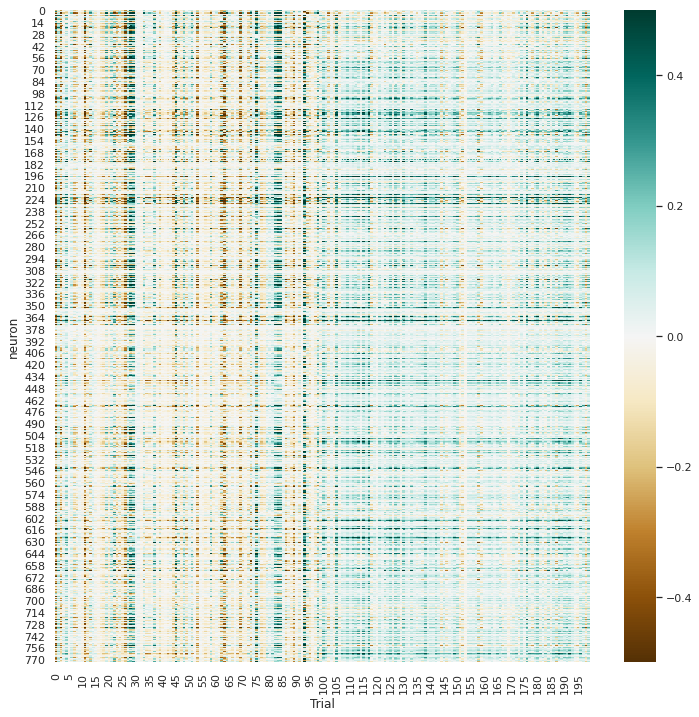

In [7]:
dav.plot_raster_sorted_activity(Ses=tmp)

In [5]:
tmp.find_all_discr_inds(region='s2')

Creating time-aggregate data set
Calculating d prime values


Shuffled discr not found!
Shuffled discr not found!
Shuffled discr not found!


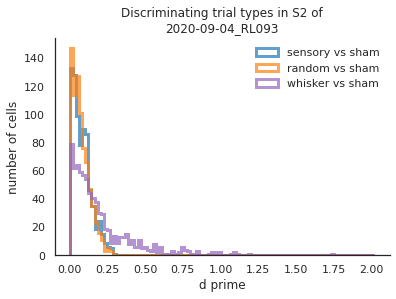

In [6]:
dav.plot_hist_discr(Ses=tmp, plot_density=False)

In [5]:
tmp.population_tt_decoder(tt_list=['whisker', 'sham'])

Time-aggregated activity object created
Decoder Cv loop 1/5
Score: 0.925
Decoder Cv loop 2/5
Score: 1.0
Decoder Cv loop 3/5
Score: 0.95
Decoder Cv loop 4/5
Score: 0.95
Decoder Cv loop 5/5
Score: 0.875
[0.925 1.    0.95  0.95  0.875]


In [8]:
# fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
# i_row, i_col = 0, 0
dict_sess_type_tt = {'sens': ['sensory', 'random', 'whisker'],
                     'proj': ['projecting', 'non_projecting']}
decoder_type = 'LDA'
n_sessions = 6
scores_dict = {}
for i_r, region in enumerate(['s1', 's2']):
    scores_dict[region] = {}
    for sess_type, tt_test_list in dict_sess_type_tt.items():
        print(f'Session type: {sess_type} in region {region}')
        scores_dict[region][sess_type] = {tt: np.zeros(n_sessions) for tt in tt_test_list}
        for i_s in tqdm(range(n_sessions)):
            tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type=sess_type)
            for i_tt, tt in enumerate(tt_test_list):
                tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region=region,
                                                            verbose=0, decoder_type=decoder_type)
                scores_dict[region][sess_type][tt][i_s] = np.mean(tmp_score_arr)



  0%|          | 0/6 [00:00<?, ?it/s]

Session type: sens in region s1


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: proj in region s1


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: sens in region s2


  0%|          | 0/6 [00:00<?, ?it/s]

Session type: proj in region s2


100%|██████████| 6/6 [03:07<00:00, 31.23s/it]


In [16]:
scores_dict

{'s1': {'sens': {'sensory': array([0.835, 0.835, 0.785, 0.91 , 0.975, 0.905]),
   'random': array([0.92 , 0.915, 0.805, 0.97 , 0.98 , 0.985]),
   'whisker': array([0.915, 0.815, 0.82 , 0.835, 0.875, 0.785])},
  'proj': {'projecting': array([0.705, 0.895, 0.84 , 0.64 , 0.72 , 0.63 ]),
   'non_projecting': array([0.69 , 0.85 , 0.955, 0.72 , 0.79 , 0.735])}},
 's2': {'sens': {'sensory': array([0.56 , 0.49 , 0.515, 0.62 , 0.505, 0.575]),
   'random': array([0.5  , 0.41 , 0.5  , 0.5  , 0.49 , 0.485]),
   'whisker': array([0.94 , 0.615, 0.81 , 0.83 , 0.905, 0.665])},
  'proj': {'projecting': array([0.565, 0.475, 0.505, 0.485, 0.515, 0.52 ]),
   'non_projecting': array([0.5  , 0.47 , 0.46 , 0.53 , 0.505, 0.525])}}}

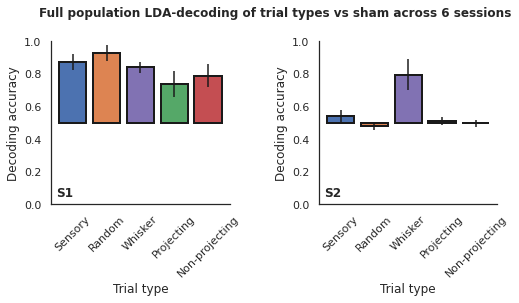

In [37]:
dav.bar_plot_decoder_accuracy(scores_dict=scores_dict)

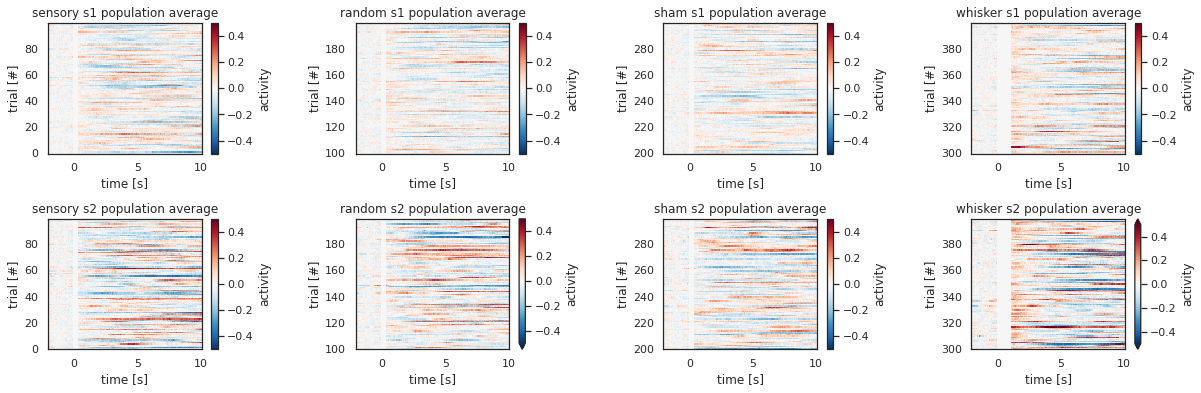

In [7]:
dav.plot_pop_av(Ses=tmp, region_list=['s1', 's2'])

100%|██████████| 6/6 [02:10<00:00, 21.68s/it]


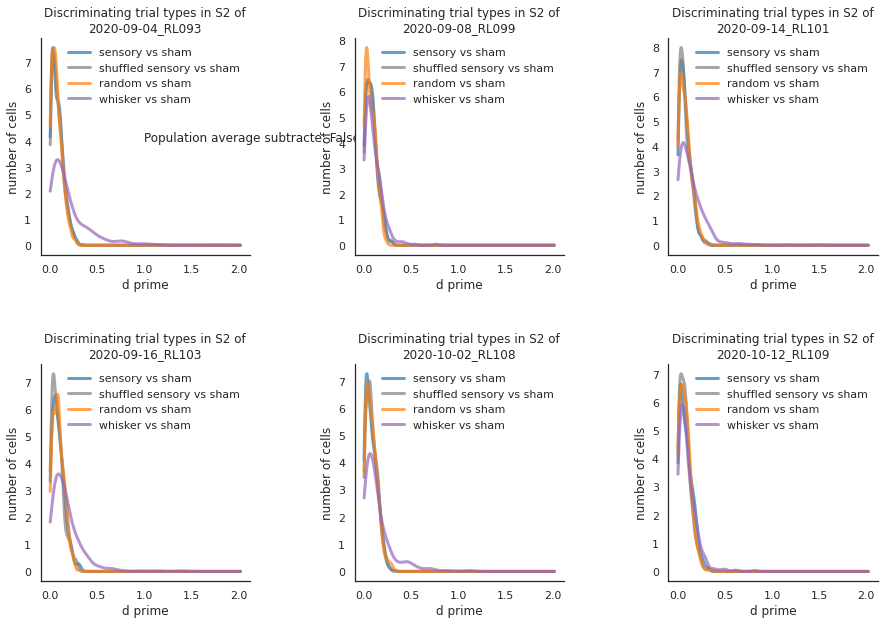

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s)
    tmp.find_all_discr_inds(region='s2', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        yscale_log=False, plot_hist=False, plot_kde=True,
                        show_all_shuffled=False)

    if i_row == 0 and i_col == 0:
        ax[i_row, i_col].text(x=1, y=4, s=f'Population average subtracte: {tmp.time_aggr_ds_pop_av_subtracted}')
    i_col += 1
    # break
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [01:44<00:00, 17.41s/it]


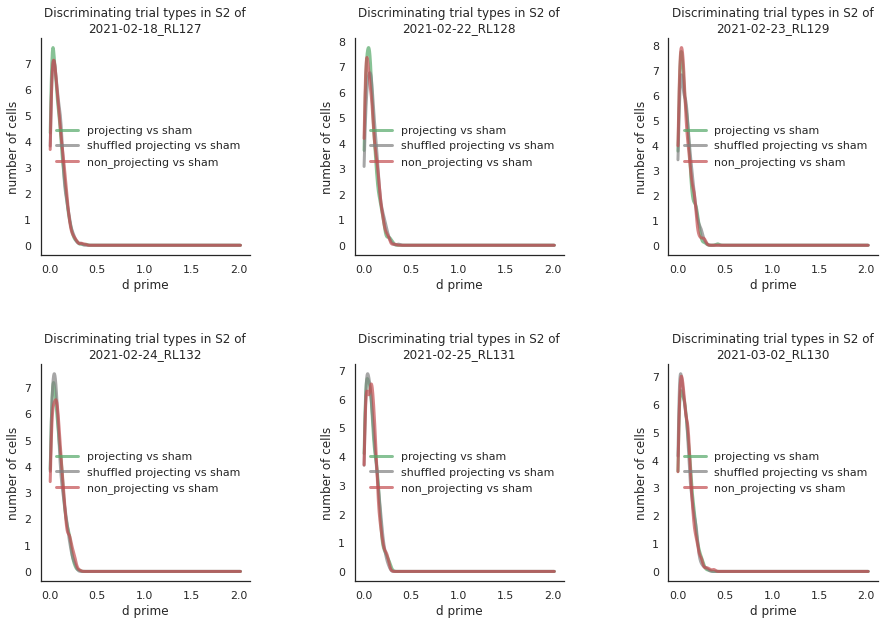

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='proj')
    tmp.find_all_discr_inds(region='s2', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, show_all_shuffled=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [03:58<00:00, 39.82s/it]


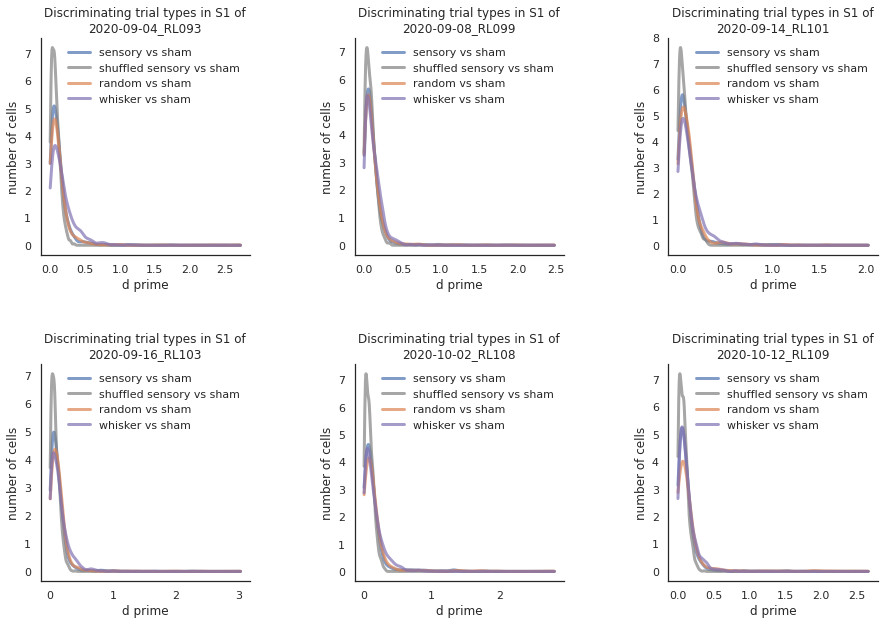

In [58]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='sens')
    tmp.find_all_discr_inds(region='s1', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, yscale_log=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

100%|██████████| 6/6 [02:28<00:00, 24.67s/it]


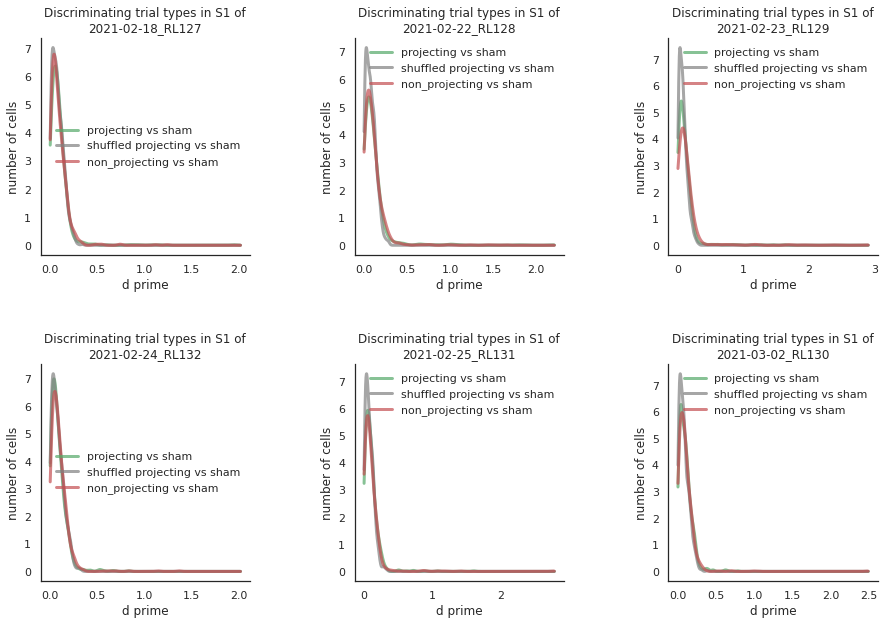

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), gridspec_kw={'wspace': 0.5, 'hspace': 0.5})
i_row, i_col = 0, 0
for i_s in tqdm(range(6)):
    tmp = dav.SimpleSession(verbose=0, session_id=i_s, sess_type='proj')
    tmp.find_all_discr_inds(region='s1', shuffled=True)
    dav.plot_hist_discr(Ses=tmp, plot_density=False, ax=ax[i_row, i_col],
                        plot_hist=False, plot_kde=True, show_all_shuffled=False)
    i_col += 1
    if i_col == 3:
        i_row += 1
        i_col = 0

In [122]:
for tt in ['whisker', 'sensory']:
    for bool_spcs in [True, False]:
        tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region='s2',
                                                    verbose=0, decoder_type='LDA',
                                                     subtract_pcs=bool_spcs)
        print(f'{tt} vs sham, {bool_spcs} subtraction PCS')
        print(tmp_score_arr)
        print('----\n')



[0.0502188  0.02004048 0.01212633]
Subtracted LFA.
whisker vs sham, True subtraction PCS
[0.4   0.525 0.55  0.675 0.4  ]
----

whisker vs sham, False subtraction PCS
[0.925 1.    0.95  0.95  0.875]
----

[0.04808933 0.0132045  0.01020422]
Subtracted LFA.
sensory vs sham, True subtraction PCS
[0.5   0.5   0.35  0.525 0.425]
----

sensory vs sham, False subtraction PCS
[0.65  0.575 0.55  0.475 0.55 ]
----



In [123]:
for tt in ['whisker', 'sensory']:
    for bool_spcs in [True, False]:
        tmp_score_arr = tmp.population_tt_decoder(tt_list=[tt, 'sham'], region='s2',
                                                    verbose=0, decoder_type='LDA',
                                                     subtract_pcs=bool_spcs)
        print(f'{tt} vs sham, {bool_spcs} PC activity only')
        print(tmp_score_arr)
        print('----\n')



[0.05021881 0.02004049 0.01212616]
Subtracted LFA.
whisker vs sham, True PC activity only
[0.9   0.95  0.925 0.85  0.825]
----

whisker vs sham, False PC activity only
[0.925 1.    0.95  0.95  0.875]
----

[0.04808929 0.01320452 0.01020572]
Subtracted LFA.
sensory vs sham, True PC activity only
[0.475 0.4   0.625 0.45  0.5  ]
----

sensory vs sham, False PC activity only
[0.65  0.575 0.55  0.475 0.55 ]
----

